Basic Q learning implementation


In [ ]:
import numpy as np

a=np.random.randn(3,3) # a.shape = (4, 3)a.shape=(4,3)

b = np.random.randn(3, 3)

c=a**2 + b.T**2

print(c.shape)

(3, 3)


In [ ]:
import numpy as np

q = np.matrix(np.zeros([6,6]))

r = np.matrix([[-1, -1, -1, -1,  0,  -1],
[-1, -1, -1,  0, -1, 100],
[-1, -1, -1,  0, -1,  -1],
[-1,  0,  0, -1,  0,  -1],
[ 0, -1, -1,  0, -1, 100],
[-1,  0, -1, -1,  0, 100]])

gamma = 0.8
epsilon = 0.4

for episode in range(101):
  state = np.random.randint(0,6)
  while(state!=5):
    possible_actions=[]
    possible_q=[]
    for action in range(6):
      if r[state,action]>=0:
        possible_actions.append(action)
        possible_q.append(q[state,action])

    action=-1
    if np.random.random() < epsilon:
      action = possible_actions[np.random.randint(0, len(possible_actions))]
    else:
      action = possible_actions[np.argmax(possible_q)]

    q[state,action] = r[state, action] + gamma*q[action].max()

    state = action

  if episode%10==0:
    print("Training episode: %d" % episode)
    print(q)



Training episode: 0
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
Training episode: 10
[[  0.   0.   0.   0.  80.   0.]
 [  0.   0.   0.  64.   0. 100.]
 [  0.   0.   0.  64.   0.   0.]
 [  0.  80.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 100.]
 [  0.   0.   0.   0.   0.   0.]]
Training episode: 20
[[  0.   0.   0.   0.  80.   0.]
 [  0.   0.   0.  64.   0. 100.]
 [  0.   0.   0.  64.   0.   0.]
 [  0.  80.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 100.]
 [  0.   0.   0.   0.   0.   0.]]
Training episode: 30
[[  0.    0.    0.    0.   80.    0. ]
 [  0.    0.    0.   64.    0.  100. ]
 [  0.    0.    0.   64.    0.    0. ]
 [  0.   80.   51.2   0.    0.    0. ]
 [  0.    0.    0.   64.    0.  100. ]
 [  0.    0.    0.    0.    0.    0. ]]
Training episode: 40
[[  0.    0.    0.    0.   80.    0. ]
 [  0.    0.    0.   64.    0.  100. ]
 [  0.    0.    0.   64.    0.    0. ]
 [  0.   80.   51.2

Cart pole using Q learning

In [ ]:
import numpy as np
import gym
import time
import math

env = gym.make("CartPole-v1")
print(env.action_space.n)

2


In [ ]:
LEARNING_RATE=0.1

DISCOUNT=0.95
EPISODES=100000
total=0
total_reward=0
prior_reward=0

Observation = [30,30,50,50]
np_array_win_size= np.array([0.25,0.25,0.1,0.1])

epsilon=0.6

#epsilon_decay_value = 0.99995

In [ ]:
q_table = np.random.uniform(low=0, high=1, size=(Observation + [env.action_space.n]))
q_table.shape

(30, 30, 50, 50, 2)

In [ ]:
def get_discrete_state(state):
  discrete_state = state/np_array_win_size+ np.array([15,10,1,10])
  return tuple(discrete_state.astype(np.int))

In [ ]:
max=0
for episode in range(EPISODES + 1):
  t0 = time.time()
  discrete_state=get_discrete_state(env.reset())
  done=False
  episode_reward=0
  timet = 0
  if episode %2000 ==0:
    print("Episode: " + str(episode))
  while not done:
    #env.render()
    timet+=1
    if np.random.random() > epsilon:
      action = np.argmax(q_table[discrete_state])
    else:
      action = np.random.randint(0, env.action_space.n)

    new_state, reward, done, _=env.step(action)

    episode_reward += reward

    new_discrete_state = get_discrete_state(new_state)

    if not done:
      max_future_q = np.max(q_table[new_discrete_state])

      current_q = q_table[discrete_state + (action,)]

      new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)

      q_table[discrete_state + (action,)] = new_q

    discrete_state = new_discrete_state

  """if epsilon>0.05:
    if episode_reward > prior_reward and episode >10000:
      epsilon = math.pow(epsilon_decay_value, episode - 10000)

      if episode % 500 ==0:
        print("Epsilon: " + str(epsilon))"""

  t1=time.time()
  episode_total =t1-t0
  total = total + episode_total

  total_reward += episode_reward
  prior_reward = episode_reward

  if max < episode_reward:
    max = episode_reward

  if episode % 1000 == 0:
    mean = total/1000
    print("Time Average: "+ str(mean))
    total=0

    print("Time = "+ str(timet))

    mean_reward = total_reward/1000
    print("Mean Reward: "+str(episode_reward))
    total_reward = 0

print("-------------------------")
print(max)
env.close()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


Episode: 0
Time Average: 2.9044151306152345e-06
Time = 22
Mean Reward: 22.0
Time Average: 0.0012657699584960938
Time = 34
Mean Reward: 34.0
Episode: 2000
Time Average: 0.001738178014755249
Time = 18
Mean Reward: 18.0
Time Average: 0.0021098966598510744
Time = 32
Mean Reward: 32.0
Episode: 4000
Time Average: 0.002218496084213257
Time = 82
Mean Reward: 82.0
Time Average: 0.0024523165225982667
Time = 49
Mean Reward: 49.0
Episode: 6000
Time Average: 0.002152076482772827
Time = 43
Mean Reward: 43.0
Time Average: 0.0021406819820404053
Time = 23
Mean Reward: 23.0
Episode: 8000
Time Average: 0.0020290515422821047
Time = 51
Mean Reward: 51.0
Time Average: 0.0021178383827209473
Time = 20
Mean Reward: 20.0
Episode: 10000
Time Average: 0.002208613395690918
Time = 56
Mean Reward: 56.0
Time Average: 0.002173272371292114
Time = 21
Mean Reward: 21.0
Episode: 12000
Time Average: 0.00220096755027771
Time = 42
Mean Reward: 42.0
Time Average: 0.002359729051589966
Time = 97
Mean Reward: 97.0
Episode: 14000

Mountain Car using Q learning

Episode 100 Average Reward: -200.0
Episode 200 Average Reward: -200.0
Episode 300 Average Reward: -200.0
Episode 400 Average Reward: -200.0
Episode 500 Average Reward: -200.0
Episode 600 Average Reward: -200.0
Episode 700 Average Reward: -200.0
Episode 800 Average Reward: -200.0
Episode 900 Average Reward: -200.0
Episode 1000 Average Reward: -200.0
Episode 1100 Average Reward: -200.0
Episode 1200 Average Reward: -200.0
Episode 1300 Average Reward: -200.0
Episode 1400 Average Reward: -200.0
Episode 1500 Average Reward: -200.0
Episode 1600 Average Reward: -200.0
Episode 1700 Average Reward: -200.0
Episode 1800 Average Reward: -200.0
Episode 1900 Average Reward: -200.0
Episode 2000 Average Reward: -200.0
Episode 2100 Average Reward: -200.0
Episode 2200 Average Reward: -200.0
Episode 2300 Average Reward: -200.0
Episode 2400 Average Reward: -200.0
Episode 2500 Average Reward: -200.0
Episode 2600 Average Reward: -200.0
Episode 2700 Average Reward: -200.0
Episode 2800 Average Reward: -199.29


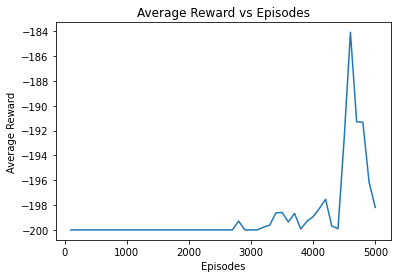

In [ ]:
import numpy as np
import gym
import matplotlib.pyplot as plt

env = gym.make("MountainCar-v0")
env.reset()

learning=0.2
discount = 0.9
epsilon = 0.8
min_eps = 0
episodes = 5000


num_states = (env.observation_space.high - env.observation_space.low)*\
                    np.array([10, 100])
num_states = np.round(num_states, 0).astype(int)+1


Q = np.random.uniform(low=-1, high=1, size = (num_states[0], num_states[1], env.action_space.n))

reward_list=[]
ave_reward_list=[]

reduction = (epsilon-min_eps)/episodes

for i in range(episodes):
  done=False
  tot_reward, reward = 0,0
  state=env.reset()

  state_adj = (state - env.observation_space.low)*np.array([10, 100])
  state_adj = np.round(state_adj, 0).astype(int)

  while not done:
    env.render()

    if np.random.random() < 1-epsilon:
      action = np.argmax(Q[state_adj[0], state_adj[1]])
    else:
      action = np.random.randint(0, env.action_space.n)

    state2, reward, done, info = env.step(action)

    state2_adj = (state2 - env.observation_space.low)*np.array([10, 100])
    state2_adj = np.round(state2_adj, 0).astype(int)

    if done and state2[0] >= 0.5:
      Q[state_adj[0], state_adj[1], action] = reward

    else:
      delta = learning*(reward + discount*np.max(Q[state2_adj[0], state2_adj[1]]) - Q[state_adj[0], state_adj[1], action])
      Q[state_adj[0], state_adj[1], action] += delta

    tot_reward +=reward
    state_adj = state2_adj

  if epsilon > min_eps:
    epsilon -= reduction

  reward_list.append(tot_reward)

  if (i+1) % 100 ==0:
    ave_reward = np.mean(reward_list)
    ave_reward_list.append(ave_reward)
    reward_list = []

  if (i+1) % 100 ==0:
    print('Episode {} Average Reward: {}'.format(i+1, ave_reward))

env.close()


plt.plot(100*(np.arange(len(ave_reward_list)) + 1), ave_reward_list)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')
plt.show()